# CRM Navigator: Impulsando el Crecimiento Empresarial con Datos

CRM Navigator es un software diseñado para ayudar a las empresas en la gestión eficiente de clientes. Desarrollado con herramientas avanzadas de análisis de datos y utilizando Python como base tecnológica, este programa recopila y analiza información clave sobre los clientes, como:

- Edad
- Género
- Ingresos anuales
- Puntaje de gasto
- Profesión
- Experiencia laboral
- Tamaño de la familia

Al emplear técnicas de ciencia de datos, CRM Navigator proporciona a las empresas insights valiosos sobre el comportamiento y las preferencias de sus clientes. Esto les permite:

- Segmentar a los clientes en grupos según sus características compartidas.
- Predecir el comportamiento de gasto futuro de los clientes.
- Tomar decisiones estratégicas basadas en datos para mejorar la satisfacción del cliente y aumentar las ventas.

## Ventajas del CRM Navigator

- Gestión eficiente de clientes.
- Análisis avanzado de datos.
- Segmentación de clientes precisa.
- Predicción del comportamiento de gasto.
- Toma de decisiones estratégicas basadas en datos.

## Tecnologías Utilizadas

- Python
- Herramientas avanzadas de análisis de datos

¡Con CRM Navigator, impulsa el crecimiento empresarial comprendiendo mejor a tus clientes y tomando decisiones estratégicas informadas!



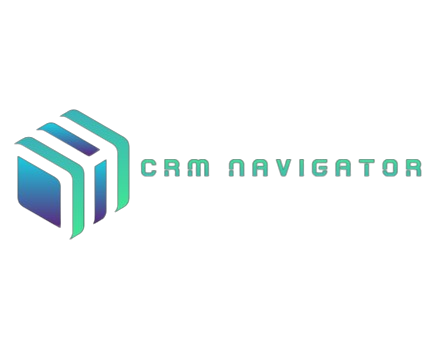

# Desarrollo des proyecto

## Entendimiento de los Datos

El proceso de **Entendimiento de los Datos** implica utilizar la biblioteca Pandas en Python para cargar y explorar datos. Esto se logra mediante:

### Tarea en Python:
- **Pandas**: Biblioteca de análisis de datos en Python.
- **Cargar y Explorar Datos**: 
  - Leer archivos de datos.
  - Calcular estadísticas básicas.
  - Visualizar la distribución de datos.

### Actividades Específicas:
1. **Leer el Archivo de Datos en Python**:
   - Utilizando funciones como `read_csv()` de Pandas.
2. **Calcular Estadísticas Simples**:
   - Media, mediana, desviación estándar, etc.
3. **Visualizar la Distribución de Datos**:
   - Utilizando gráficos básicos como histogramas, gráficos de barras, y gráficos de pastel.

Este enfoque permite comprender la estructura y las características de los datos, lo que es fundamental para el análisis de datos subsiguiente.


(2000, 8)

Columna    Tipo
0              CustomerID   int64
1                  Gender  object
2                     Age   int64
3       Annual Income ($)   int64
4  Spending Score (1-100)   int64
5              Profession  object
6         Work Experience   int64
7             Family Size   int64

CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6

CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
1995        1996  Female   71             184387                      40   
1996        1997  Female   91              73158                      32   
1997        1998    Male   87              90961                      14   
1998        1999    Male   77             182109                       4   
1999        2000    Male   90             110610                      52   

         Profession  Work Experience  Family Size  
1995         Artist                8            7  
1996         Doctor                7            7  
1997     Healthcare                9            2  
1998      Executive                7            2  
1999  Entertainment                5            2

Columna  Valores Nulos
0              CustomerID              0
1                  Gender              0
2                     Age              0
3       Annual Income ($)              0
4  Spending Score (1-100)              0
5              Profession             35
6         Work Experience              0
7             Family Size              0

0

El total de datos después de remover los vacíos es de: 1965


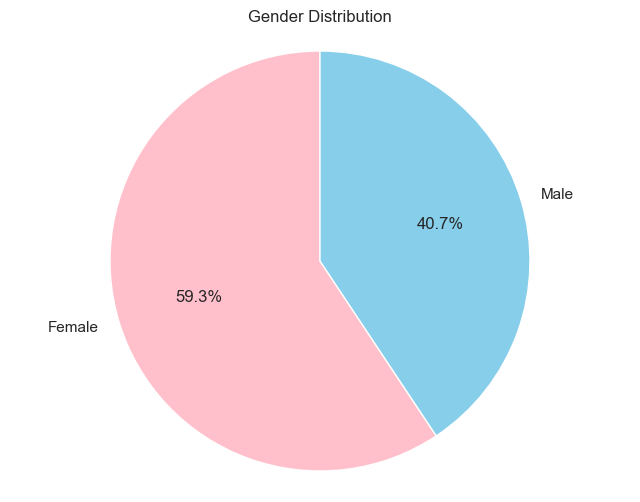

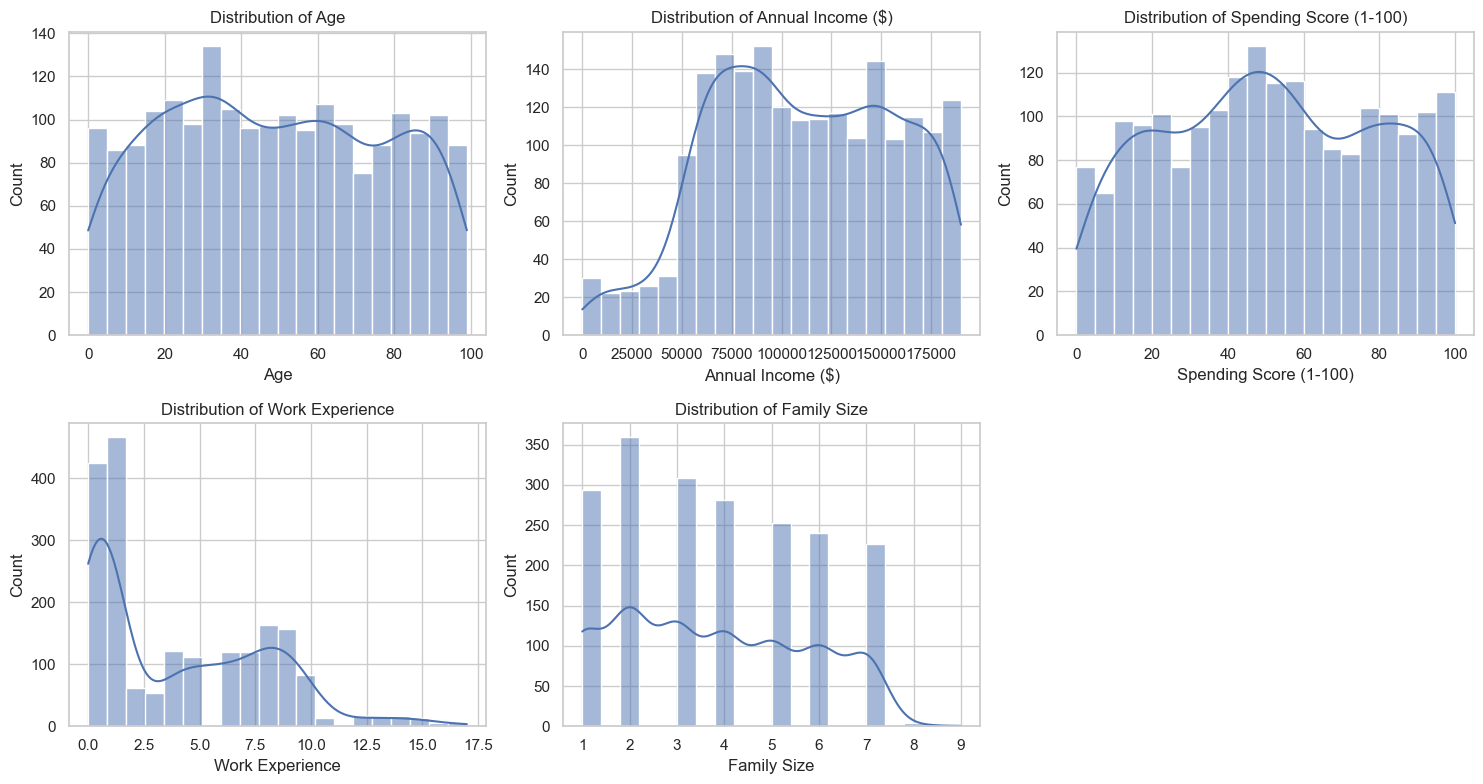

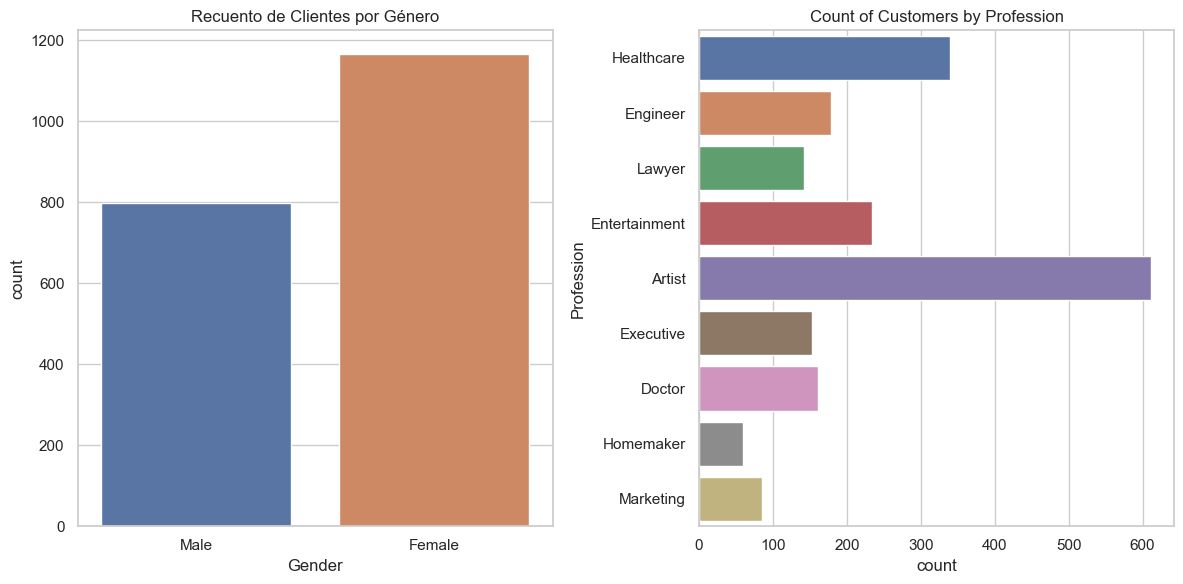

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from IPython.display import display, HTML

# Leer el archivo CSV
customers = pd.read_csv('Customers.csv')
customers.head(5)

# Descripción de Datos
def data_description(customers, head=5):
    display(HTML("<h3 style='text-align:left;'>Tamaño:</h3>"))
    display(customers.shape)
    
    display(HTML("<h3 style='text-align:center;'>TIPOS:</h3>"))
    display(customers.dtypes.to_frame().reset_index().rename(columns={'index': 'Columna', 0: 'Tipo'}))
    
    display(HTML("<h3 style='text-align:center;'>HEAD:</h3>"))
    display(customers.head(head))
    
    display(HTML("<h3 style='text-align:center;'>TAIL:</h3>"))
    display(customers.tail(head))
    
    display(HTML("<h3 style='text-align:center;'>VALORES NULOS:</h3>"))
    display(customers.isnull().sum().to_frame().reset_index().rename(columns={'index': 'Columna', 0: 'Valores Nulos'}))
    
    display(HTML("<h3 style='text-align:center;'>VALORES DUPLICADOS:</h3>"))
    display(customers.duplicated().sum())

data_description(customers)

# Limpieza de datos
cust_clean = customers.dropna()
print("El total de datos después de remover los vacíos es de:", len(cust_clean))

# Visualización de los datos

# Gráfico de barras para distribución de género
gender = cust_clean['Gender'].value_counts().reset_index()
gender.columns = ['Gender', 'Count']
colors = ['pink', 'skyblue']
plt.figure(figsize=(8, 6))
plt.pie(gender['Count'], labels=gender['Gender'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

# Gráficos de historiograma para valores numéricos
sns.set(style='whitegrid')
plt.figure(figsize=(15, 8))
for i, col in enumerate(['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size'], start=1):
    plt.subplot(2, 3, i)
    sns.histplot(cust_clean[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Gráficos de barras para categorías
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=cust_clean)
plt.title('Recuento de Clientes por Género')
plt.subplot(1, 2, 2)
sns.countplot(y='Profession', data=cust_clean)
plt.title('Count of Customers by Profession')

plt.tight_layout()
plt.show()

## Análisis de Segmentación

En el proceso de **Análisis de Segmentación**, el objetivo es identificar grupos de clientes basados en características similares. Esto se logra a través de las siguientes actividades específicas:

### Tarea en Python:
- **Identificar Grupos de Clientes**: Utilizando técnicas de agrupamiento para segmentar a los clientes en grupos basados en características similares.

### Actividades Específicas:
1. **Utilizar Técnicas de Agrupamiento**:
   - Aplicar algoritmos de agrupamiento como K-Means, o jerárquico para dividir a los clientes en grupos basados en sus características compartidas.
2. **Visualizar los Grupos Resultantes**:
   - Crear gráficos o visualizaciones para entender las características de cada grupo y cómo se diferencian entre sí.

Este proceso ayuda a las empresas a comprender mejor a su base de clientes y adaptar sus estrategias de marketing y servicio al cliente para satisfacer las necesidades específicas de cada segmento.


C:\Users\jhuom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jhuom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jhuom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jhuom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

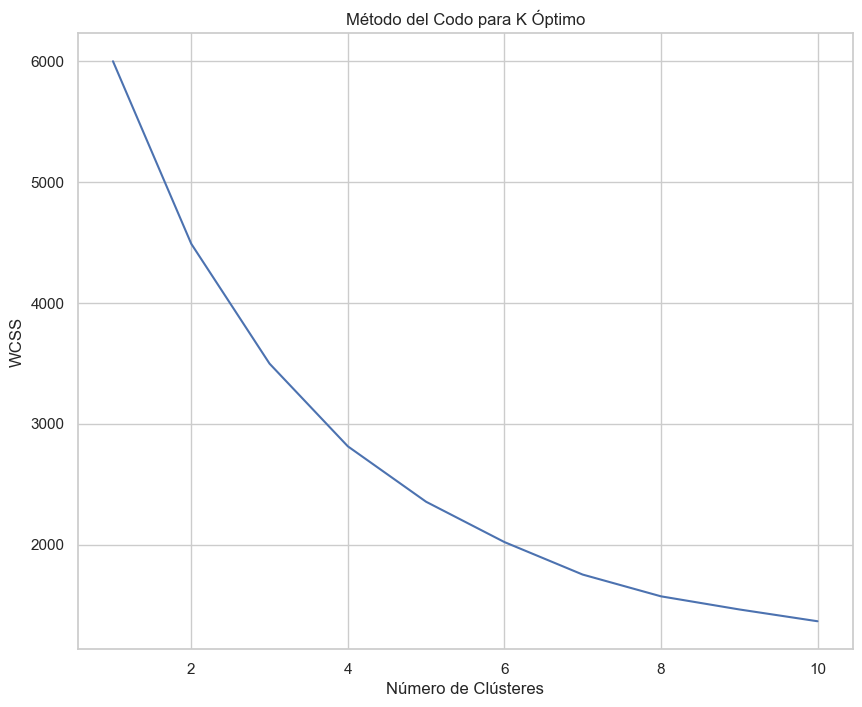

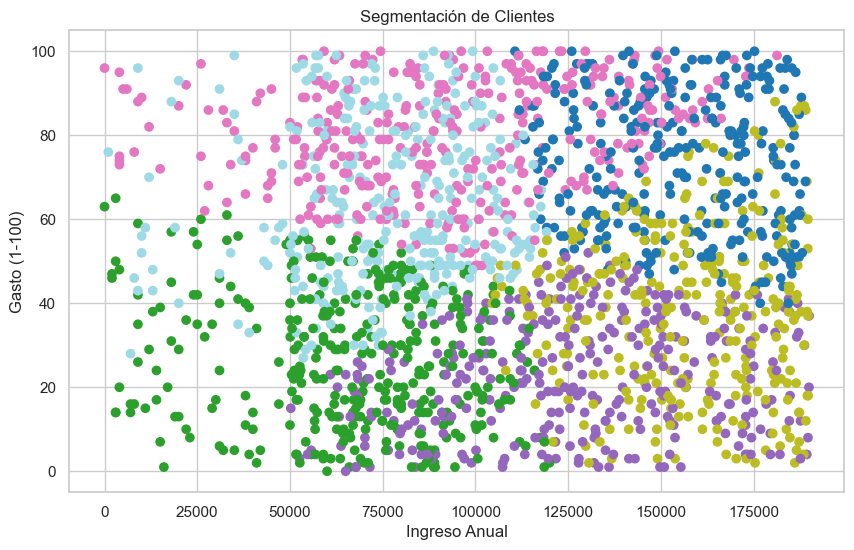

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import silhouette_score 

# Cargar los datos
data = pd.read_csv("Customers.csv")  # Ajustar la ruta según la estructura de tu directorio
data.head()  # Mostrar las primeras filas para asegurarse de que la carga de datos sea exitosa

# Extraer características relevantes
J = data[['Age','Annual Income ($)','Spending Score (1-100)']] 

# Estandarizar las características
scaler = StandardScaler() 
J_scaled = scaler.fit_transform(J)  

# Determinar el número óptimo de clústeres utilizando el método del codo
wcss = []
for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, max_iter=50, random_state=0)
    kmeans.fit(J_scaled)
    wcss.append(kmeans.inertia_)

# Graficar la curva del codo
plt.figure(figsize=(10, 8)) 
plt.plot(range(1, 11), wcss)
plt.title("Método del Codo para K Óptimo")
plt.xlabel("Número de Clústeres")
plt.ylabel('WCSS')
plt.show()

# Realizar el clustering KMeans con el número óptimo de clústeres
kmeans = KMeans(n_clusters=6, init='k-means++', n_init=10, random_state=35)
data['Cluster'] = kmeans.fit_predict(J_scaled)

# Visualizar los clústeres
plt.figure(figsize=(10, 6))
plt.scatter(J['Annual Income ($)'], J['Spending Score (1-100)'], c=data['Cluster'], cmap='tab20')
plt.title("Segmentación de Clientes")
plt.xlabel("Ingreso Anual")
plt.ylabel("Gasto (1-100)")
plt.show()


# Predicción del Gasto del Cliente

En esta sección se aborda la tarea de **Predicción del Gasto del Cliente** utilizando Python. Las actividades específicas son las siguientes:

## Tarea en Python:
- **Construir un modelo para predecir el gasto del cliente**.

## Actividades Específicas:
1. **Dividir los datos en conjuntos de entrenamiento y prueba**:
   - Se divide el conjunto de datos en dos partes: una para entrenar el modelo y otra para evaluar su rendimiento.

2. **Entrenar un modelo de regresión para predecir el gasto del cliente**:
   - Se utiliza un modelo de regresión, como Regresión Lineal, Regresión Ridge, Regresión Lasso, o Regresión de Bosques Aleatorios, para entrenar el modelo con los datos de entrenamiento.

3. **Evaluar el rendimiento del modelo utilizando métricas de regresión**:
   - Se calculan métricas de evaluación del rendimiento del modelo, como el error cuadrático medio (MSE), el coeficiente de determinación (R²), y otros, utilizando los datos de prueba.

Estas actividades constituyen una metodología robusta para construir y evaluar modelos de regresión que puedan predecir el gasto del cliente con precisión.


Mean Squared Error: 778.4189467515738
R^2 Score: -0.01444023491014379


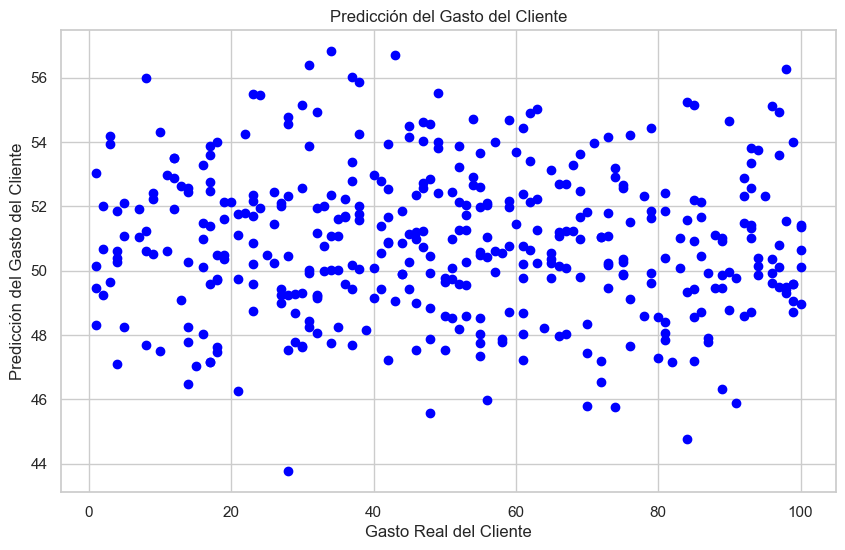

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Leer el archivo CSV
customers_df = pd.read_csv('Customers.csv')

# Codificar variables categóricas
customers_df_encoded = pd.get_dummies(customers_df, columns=['Profession'], drop_first=True, prefix='Profession')

# Seleccionar características y variable objetivo
X = customers_df_encoded[['Annual Income ($)', 'Age', 'Profession_Healthcare', 'Work Experience', 'Family Size']]
y = customers_df_encoded['Spending Score (1-100)']

# Paso 1: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 2: Entrenar un modelo de regresión para predecir el gasto del cliente
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Paso 3: Evaluar el rendimiento del modelo utilizando métricas de regresión
y_pred = regression_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# Visualizar la predicción del gasto del cliente
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Predicción del Gasto del Cliente')
plt.xlabel('Gasto Real del Cliente')
plt.ylabel('Predicción del Gasto del Cliente')
plt.show()


# Descubrimiento de Insights

En esta sección se aborda la tarea de **Descubrimiento de Insights** utilizando Python, haciendo uso de Pandas y visualizaciones para encontrar patrones en los datos. Las actividades específicas son las siguientes:

## Tarea en Python:
- **Utilizar Pandas y visualizaciones para encontrar patrones en los datos**.

## Actividades Específicas:
1. **Explorar relaciones entre las características utilizando gráficos de dispersión y correlación**:
   - Se emplean gráficos de dispersión para visualizar las relaciones entre pares de características, y se calcula la matriz de correlación para cuantificar la relación lineal entre ellas.
2. **Identificar patrones de comportamiento mediante técnicas de análisis visual**:
   - Se utilizan técnicas de visualización, como gráficos de barras, histogramas, y diagramas de caja, para identificar patrones y tendencias en los datos, lo que permite obtener insights valiosos sobre el comportamiento de los clientes.

Este enfoque ayuda a comprender mejor la estructura y las características de los datos, facilitando la identificación de patrones y tendencias que pueden ser utilizados para tomar decisiones informadas en el ámbito empresarial.


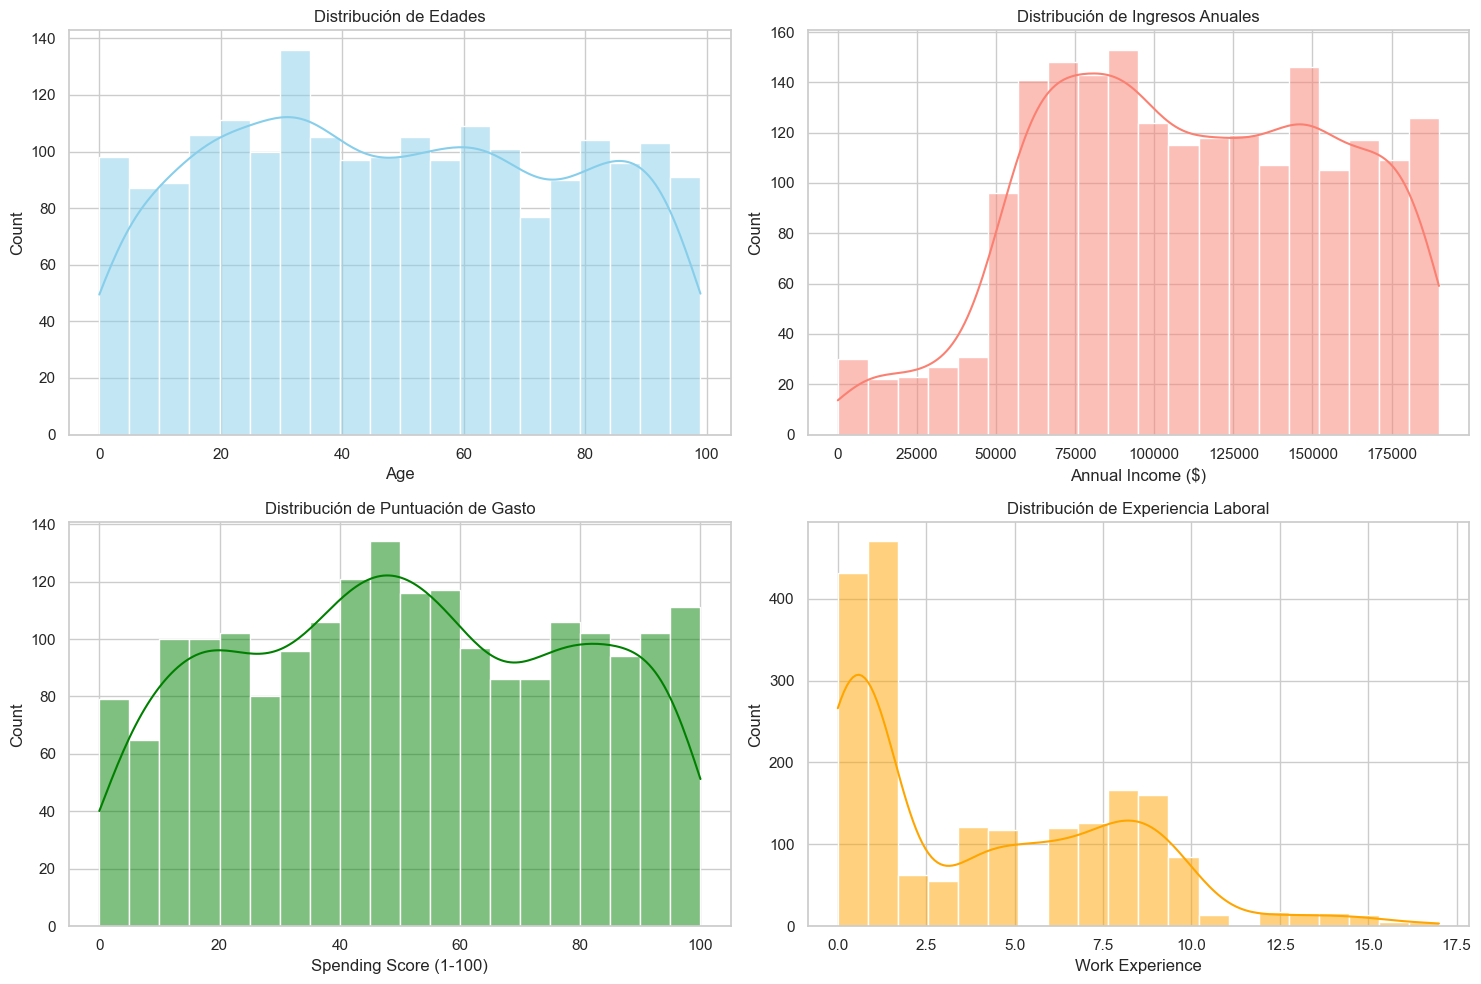

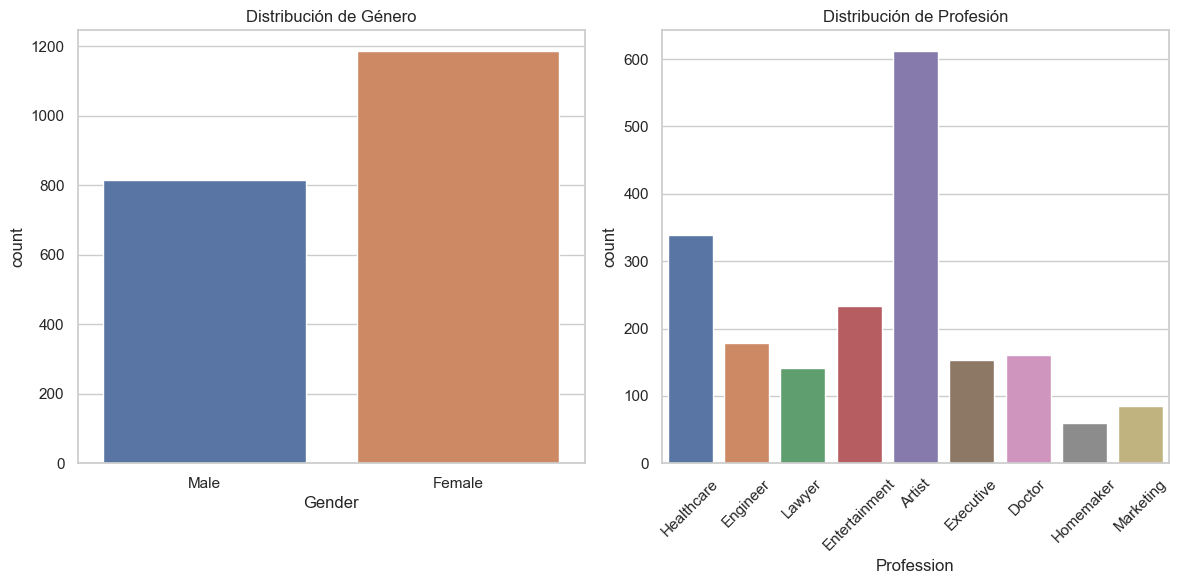

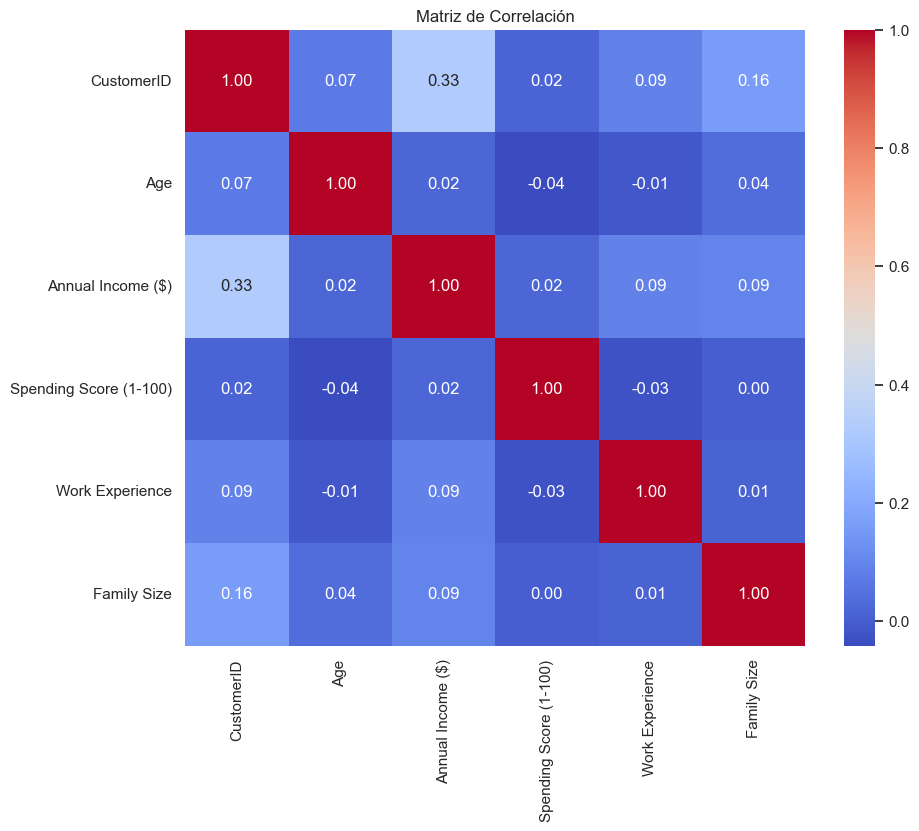

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leer el archivo CSV
data = pd.read_csv('Customers.csv')

# Visualizar distribuciones de variables numéricas mediante histogramas
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(data['Age'], kde=True, color='skyblue', bins=20)
plt.title('Distribución de Edades')

plt.subplot(2, 2, 2)
sns.histplot(data['Annual Income ($)'], kde=True, color='salmon', bins=20)
plt.title('Distribución de Ingresos Anuales')

plt.subplot(2, 2, 3)
sns.histplot(data['Spending Score (1-100)'], kde=True, color='green', bins=20)
plt.title('Distribución de Puntuación de Gasto')

plt.subplot(2, 2, 4)
sns.histplot(data['Work Experience'], kde=True, color='orange', bins=20)
plt.title('Distribución de Experiencia Laboral')

plt.tight_layout()
plt.show()

# Visualizar distribución de variables categóricas mediante diagramas de barras
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=data)
plt.title('Distribución de Género')

plt.subplot(1, 2, 2)
sns.countplot(x='Profession', data=data)
plt.title('Distribución de Profesión')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Eliminar columnas no numéricas
data_numeric = data.select_dtypes(include=['int64', 'float64'])

# Calcular matriz de correlación
correlation_matrix = data_numeric.corr()

# Visualizar matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

# Calcular estadísticas descriptivas para las variables numéricas
stats_descriptivas = data_numeric.describe()


# Recomendaciones y Acciones

En esta sección se aborda la tarea de **Recomendaciones y Acciones** utilizando Python, con el objetivo de proponer acciones basadas en los hallazgos del análisis de datos. Las actividades específicas son las siguientes:

## Tarea en Python:
- **Proponer acciones basadas en los hallazgos del análisis**.

## Actividades Específicas:
1. **Resumir los principales hallazgos y proponer estrategias de marketing o mejoras en los servicios**:
   - Se realiza un resumen de los principales hallazgos obtenidos del análisis de datos.
   - Se proponen estrategias de marketing o mejoras en los servicios de la empresa, basadas en los hallazgos identificados, con el objetivo de optimizar el rendimiento y la satisfacción del cliente.

2. **Crear visualizaciones efectivas para comunicar las recomendaciones a las partes interesadas**:
   - Se utilizan visualizaciones claras y efectivas, como gráficos, tablas, para comunicar de manera visual las recomendaciones derivadas del análisis de datos a las partes interesadas.
   - Estas visualizaciones ayudan a transmitir la información de manera concisa y comprensible, facilitando la toma de decisiones por parte de la dirección y otros involucrados en el proceso de toma de decisiones.

Este enfoque permite transformar los insights obtenidos del análisis de datos en acciones concretas y orientadas a resultados, contribuyendo así al éxito y crecimiento de la empresa.


Tabla de Porcentaje de Ahorro por Cliente:



CustomerID  Ingreso Mensual  Gasto Mensual Total  Porcentaje de Ahorro
0              1      1250.000000                 3000           -140.000000
1              2      2916.666667                 4500            -54.285714
2              3      7166.666667                 1500             79.069767
3              4      4916.666667                 1000             79.661017
4              5      3166.666667                 5000            -57.894737
...          ...              ...                  ...                   ...
1995        1996     15365.583333                11500             25.157413
1996        1997      6096.500000                10500            -72.229968
1997        1998      7580.083333                10000            -31.924671
1998        1999     15175.750000                 8000             47.284319
1999        2000      9217.500000                 6000             34.906428

[2000 rows x 4 columns]

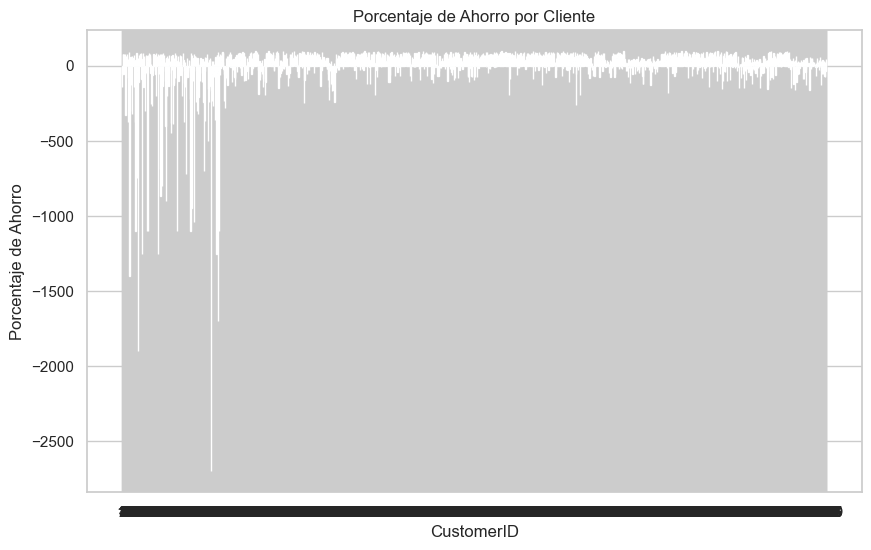

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv('Customers.csv')

# Calcular el ingreso mensual
df['Ingreso Mensual'] = df['Annual Income ($)'] / 12

# Calcular el gasto mensual total
df['Gasto Mensual Total'] = df['Work Experience'] * 1000 + df['Family Size'] * 500

# Calcular el porcentaje de ahorro
df['Porcentaje de Ahorro'] = ((df['Ingreso Mensual'] - df['Gasto Mensual Total']) / df['Ingreso Mensual']) * 100

# Visualizar los resultados
print("Tabla de Porcentaje de Ahorro por Cliente:\n")
display(df[['CustomerID', 'Ingreso Mensual', 'Gasto Mensual Total', 'Porcentaje de Ahorro']])

# Gráfico de barras para visualizar el porcentaje de ahorro
plt.figure(figsize=(10, 6))
plt.bar(df['CustomerID'], df['Porcentaje de Ahorro'], color='skyblue')
plt.xlabel('CustomerID')
plt.ylabel('Porcentaje de Ahorro')
plt.title('Porcentaje de Ahorro por Cliente')
plt.xticks(df['CustomerID'])
plt.show()
